# Homework 5: Neural Networks for Recognition

#### **For each question please refer to the handout for more details.**

Programming questions begin at **Q2**. **Remember to run all cells** and save the notebook to your local machine as a pdf for gradescope submission.


# Collaborators
**List your collaborators for all questions here**:


---

# Q1 Theory


## Q1.1 (3 points)


Softmax is defined as below, for each index $i$ in a vector $x \in \mathbb{R}^d$.
$$ softmax(x)_i = \frac{e^{x_i}}{\sum_j e^{x_j}} $$
Prove that softmax is invariant to translation, that is
$$ softmax(x) = softmax(x + c) \quad \forall c \in \mathbb{R}.$$    
Often we use $c = -\max x_i$. Why is that a good idea? (Tip: consider the range of values that numerator will have with $c=0$ and $c = -\max x_i$)

---
We know that:  
$$ softmax(x)_i = \frac{e^{x_i}}{\sum_j e^{x_j}} $$

We can write the softmax(x + c) as:
$$ softmax(x + c) = \frac{e^{x + c}}{\sum_j e^{x_j + c}} $$

$$ softmax(x + c) = \frac{e^{x}.e^{c}}{e^{c}\sum_j e^{x_j}} $$

$$ softmax(x + c) = \frac{e^{x_i}}{\sum_j e^{x_j}} $$

Hence,

$$ softmax(x) = softmax(x + c) \quad \forall c \in \mathbb{R}.$$  

---

## Q1.2

Softmax can be written as a three-step process, with $s_i = e^{x_i}$, $S = \sum s_i$ and $softmax(x)_i = \frac{1}{S} s_i$.

### Q1.2.1 (1 point)

As $x \in \mathbb{R}^d$, what are the properties of $softmax(x)$, namely what is the range of each element? What is the sum over all elements?

---

The range of each element is between 0 and 1. Thus $softmax(x)$ belongs to [0, 1].
The sum over all elements would give us 1 since softmax converts the x values to a probability

---

### Q1.2.2 (1 point)

One could say that $\textit{"softmax takes an arbitrary real valued vector $x$ and turns it into a $\rule{3cm}{0.1mm}$''}$.

---

Probability Distribution
---

### Q1.2.3 (1 point)

Now explain the role of each step in the multi-step process.

---

The 3 steps in softmax are:  

1. Taking exponent: $s_i = e^{x_i}$  
This step converts takes an arbitrary real valued vector and applies the exponent function to map the values to a positive number.
2. Taking the sum over all values: $S = \sum s_i$
The sum calculates the total probabilities. This acts as the normalization factor.
3. Calculating softmax by dividing by the sum: $softmax(x)_i = \frac{1}{S} s_i$.
Dividing $s_i$ by the normalization factor converts the positive values to a probability distribution.

---

## Q1.3 (3 points)

Show that multi-layer neural networks without a non-linear activation function are equivalent to linear regression.




---
Let us assume a 2 layer network without non-linear activations:  

$$y_1 = W_1 x + b_1$$
$$out = W_2 y_1 + b_2$$

We can condense this as:

$$out = W_2 (W_1 x + b_1) + b_2$$
$$out = W_2 W_1 x + W_2 b_1 + b_2$$
This can be written as:  
$$out = W x + b$$
Where,
$$W = W_2 W_1$$
$$b = W_2 b_1 + b_2$$
This is equivalent to linear regression.


---

## Q1.4 (3 points)

Given the sigmoid activation function $\sigma(x) = \frac{1}{1+e^{-x}}$, derive the gradient of the sigmoid function and show that it can be written as a function of $\sigma(x)$ (without having access to $x$ directly).

---
Given the sigmoid activation function:  
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

Let,  
$$\sigma(x) = y = \frac{1}{1+e^{-x}}$$ -- equation 1

Taking the gradient:  
$$\frac{dy}{dx} = \frac{1}{1+e^{-x}}$$

$$\frac{dy}{dx} = \frac{-1}{(1+e^{-x})^2} \cdot e^{-x} \cdot -1 $$
$$\frac{dy}{dx} = \frac{1}{(1+e^{-x})^2} \cdot e^{-x}$$

We can rewrite this equation using equation 1 as:  
$$\frac{dy}{dx} = \frac{1}{y^2} \cdot e^{-x}$$ -- equation 2

Rewriting equation 1 as
$$y = \frac{1}{1+e^{-x}}$$ -- equation 1

$$1+e^{-x} = \frac{1}{y}$$
$$e^{-x} = \frac{1}{y} - 1$$
$$e^{-x} = \frac{1 - y}{y}$$

Substituting the value of $e^{-x}$ in equation 2

$$\frac{dy}{dx} = \frac{1}{y^2} \cdot \frac{1 - y}{y}$$


$$\frac{dy}{dx} = y \cdot (1 - y)$$

We can rewrite this as:

$$\frac{d\sigma}{dx} = \sigma(x) \cdot (1-\sigma(x))$$


---

## Q1.5 (12 points)

Given $y = Wx + b$ (or $y_i = \sum_{j=1}^d  x_{j} W_{ij} + b_i$), and the gradient of some loss $J$ (a scalar) with respect to $y$, show how to get the gradients $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$. Be sure to do the derivatives with scalars and re-form the matrix form afterwards. Here are some notional suggestions.
$$ x \in \mathbb{R}^{d \times 1} \quad y \in \mathbb{R}^{k \times 1} \quad W \in \mathbb{R}^{k \times d} \quad b \in \mathbb{R}^{k \times 1} \quad \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{k \times 1} $$

---

We are given:  
$y = Wx + b$ and $\frac{dJ}{dy}$

Let, $\frac{dJ}{dy} = u$ where u is some scalar

$\frac{\partial J}{\partial W}$:  
$$\frac{\partial J}{\partial W} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial W} = u  \frac{\partial y}{\partial W}$$

We know that:
$$\frac{\partial y}{\partial W} = x$$

$$\frac{\partial J}{\partial W} = u \cdot x^T$$

$\frac{\partial J}{\partial x}$:  
$$\frac{\partial J}{\partial x} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial x} = u  \frac{\partial y}{\partial x}$$

We know that:
$$\frac{\partial y}{\partial x} = W$$

$$\frac{\partial J}{\partial x} = W^T \cdot u$$

$\frac{\partial J}{\partial b}$:  
$$\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial b} = u  \frac{\partial y}{\partial b}$$

We know that:
$$\frac{\partial y}{\partial b} = 1$$

$$\frac{\partial J}{\partial b} = u$$

Note: The answer are in matrix form

---

## Q1.6
When the neural network applies the elementwise activation function (such as sigmoid), the gradient of the activation function scales the backpropogation update. This is directly from the chain rule, $\frac{d}{d x} f(g(x)) = f'(g(x)) g'(x)$.

### Q1.6.1 (1 point)

Consider the sigmoid activation function for deep neural networks. Why might it lead to a "vanishing gradient" problem if it is used for many layers (consider plotting the gradient you derived in Q1.4)?

---

The sigmoid function clamps the values between 0 and 1. The derivative of the sigmoid function does not have a zero centred mean as well. If most of the values in the network are either 0 or 1 the gradient for that will be 0 and the gradients will be a really small value. When we do backprop, the gradients are multiplied with lead to vanishing gradient problem where the earlier layers of the network gets very small values of gradients or 0 gradients making them not learn anything.


---

### Q1.6.2 (1 point)
Often it is replaced with $\tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$. What are the output ranges of both $\tanh$ and sigmoid? Why might we prefer $\tanh$?

---

For sigmoid, the output ranges from [0, 1]
For tanh, the output ranges from [-1, 1]

We might prefer tanh because it centres the mean of the derivative to 0 and has higher values for gradients than sigmoid.

---

### Q1.6.3 (1 point)
Why does $\tanh(x)$ have less of a vanishing gradient problem? (plotting the gradients helps! for reference: $\tanh'(x) = 1 - \tanh(x)^2$)

---

tanh(x) has less of a vanishing gradient problem because it clamps values between [-1, 1] that means that the gradient values are higher as compared to sigmoid. For tanh the maximum gradient value goes to 1 whereas for sigmoid the maximum value is just 0.25. This means that higher values are multiplied during backprop in tanh.

---

### Q1.6.4 (1 point)
$\tanh$ is a scaled and shifted version of the sigmoid. Show how $\tanh(x)$ can be written in terms of $\sigma(x)$.

---
Given these 2 functions:

$$\tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$$
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

We know that tanh can also be written as:  

$$\tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

$$\tanh(x) = \frac{e^{x} + e^{-x} - 2e^{-x}}{e^{x}+e^{-x}}$$

$$\tanh(x) = 1 - \frac{2e^{-x}}{e^{x}+e^{-x}}$$
$$\tanh(x) = 1 - \frac{2}{e^{2x}+1}$$

We know that:  
$$\sigma(-2x) = \frac{1}{1+e^{2x}}$$

$$\tanh(x) = 1 - 2 \sigma(-2x)$$
$$\tanh(x) = 1 - 2 (1 - \sigma(2x))$$
$$\tanh(x) = 2\sigma(2x) - 1$$

Hence we can see that tanh is a scaled and shifted version of sigmoid function
---


# Q2 Implement a Fully Connected Network

Run the following code to import the modules you'll need. When implementing the functions in Q2, make sure you run the test code (provided after Q2.3) along the way to check if your implemented functions work as expected.

In [1]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.patches
from mpl_toolkits.axes_grid1 import ImageGrid

import skimage
import skimage.measure
import skimage.color
import skimage.restoration
import skimage.filters
import skimage.morphology
import skimage.segmentation

## Q2.1 Network Initialization

### Q2.1.1 (3 points)

Why is it not a good idea to initialize a network with all zeros? If you imagine that every layer has weights and biases, what can a zero-initialized network output be after training?

---

It is not a good idea to initialize the network with all zeros. This is because when the weights and biases are all zeros, the initialization or the starting point may end up to be in the flat part of the function. This would led to identical gradients as a step in any direction would not change the values at all leading to longer convergence or network not learning at all as the network might not understand what direction to go in. All neurons produce the same output when weights are 0 and the network will not be able to learn different features.

For a zero initialized network, the network would not learn at all and the output after training would be the output at initialization with zero value for weights and biases. It would learn the same output for every input.

---

### Q2.1.2 (3 points)

Implement the initialize_weights() function to initialize the weights for a single layer with Xavier initialization, where $Var[w] = \frac{2}{n_{in}+ n_{out}} $ where $n$ is the dimensionality of the vectors and you use a uniform distribution to sample random numbers (see eq 16 in [Glorot et al]).

In [2]:
############################## Q 2.1.2 ##############################
def initialize_weights(in_size,out_size,params,name=''):
    """
    we will do XW + b, with the size of the input data array X being [number of examples, in_size]
    the weights W should be initialized as a 2D array
    the bias vector b should be initialized as a 1D array, not a 2D array with a singleton dimension
    the output of this layer should be in size [number of examples, out_size]
    """
    W, b = None, None

    ##########################
    ##### your code here #####

    variance = 2.0 / (in_size + out_size)
    limit = np.sqrt(3.0 * variance)
    b = np.zeros(out_size)
    W = np.random.uniform(-limit, limit, (in_size, out_size))

    ##########################


    params['W' + name] = W
    params['b' + name] = b

### Q2.1.3 (2 points)

Why do we scale the initialization depending on layer size (see Fig 6 in the [Glorot et al])?

---

Without scaling the variance of activations and gradients will either explode or vanish as they pass through layers. Not scaling would make training unstable especially for deep networks.

---

## Q2.2 Forward Propagation

### Q2.2.1 (4 points)

Implement the sigmoid() function, which computes the elementwise sigmoid activation of entries in an input array. Then implement the forward() function which computes forward propagation for a single layer, namely $y = \sigma(X W + b)$.

In [3]:
############################## Q 2.2.1 ##############################
def sigmoid(x):
    """
    Implement an elementwise sigmoid activation function on the input x,
    where x is a numpy array of size [number of examples, number of output dimensions]
    """
    res = None

    ##########################
    ##### your code here #####
    res = 1 / (1 + np.exp(-x) )
    ##########################


    return res

In [4]:
############################## Q 2.2.1 ##############################
def forward(X,params,name='',activation=sigmoid):
    """
    Do a forward pass for a single layer that computes the output: activation(XW + b)

    Keyword arguments:
    X -- input numpy array of size [number of examples, number of input dimensions]
    params -- a dictionary containing parameters, as how you initialized in Q 2.1.2
    name -- name of the layer
    activation -- the activation function (default is sigmoid)
    """
    # compute the output values before and after the activation function
    pre_act, post_act = None, None
    # get the layer parameters
    W = params['W' + name]
    b = params['b' + name]


    ##########################
    ##### your code here #####
    pre_act = X @ W + b
    post_act = activation(pre_act)
    ##########################


    # store the pre-activation and post-activation values
    # these will be important in backpropagation
    params['cache_' + name] = (X, pre_act, post_act)

    return post_act

### Q2.2.2 (3 points)

Implement the softmax() function. Be sure to use the numerical stability trick you derived in Q1.1 softmax.

In [5]:
############################## Q 2.2.2  ##############################
def softmax(x):
    """
    x is a numpy array of size [number of examples, number of classes]
    softmax should be done for each row
    """
    res = None

    ##########################
    ##### your code here #####
    shifted_x = x - np.max(x, axis = 1, keepdims = True)
    res = np.exp(shifted_x) / np.sum(np.exp(shifted_x), axis = 1, keepdims = True)

    ##########################


    return res

### Q2.2.3 (3 points)

Implement the compute_loss_and_acc() function to compute the accuracy given a set of labels, along with the scalar loss across the data. The loss function generally used for classification is the cross-entropy loss.

$$L_{f}(\mathbf{D}) = - \sum_{(x, y)\in \mathbf{D}}y \cdot \log(f(x))$$

Here $\mathbf{D}$ is the full training dataset of $N$ data samples $x$ (which are $D \times 1$ vectors, $D$ is the dimensionality of data) and labels $y$ (which are $C\times 1$ one-hot vectors, $C$ is the number of classes), and $f:\mathbb{R}^D\to[0,1]^C$ is the classifier which outputs the probabilities for the classes.
The $\log$ is the natural $\log$.

In [6]:
############################## Q 2.2.3 ##############################
def compute_loss_and_acc(y, probs):
    """
    compute total loss and accuracy

    Keyword arguments:
    y -- the labels, which is a numpy array of size [number of examples, number of classes]
    probs -- the probabilities output by the classifier, i.e. f(x), which is a numpy array of size [number of examples, number of classes]
    """
    loss, acc = None, None

    ##########################
    ##### your code here #####
    loss = - np.sum(y * np.log(probs))

    predicted_label = np.argmax(probs, axis = 1)
    actual_label = np.argmax(y, axis = 1)
    correct_labels = (predicted_label == actual_label)
    acc = (np.sum(correct_labels)) / len(correct_labels)
    ##########################


    return loss, acc

## Q2.3 Backwards Propagation

### Q2.3 (7 points)

Implement the backwards() function to compute backpropagation for a single layer, given the original weights, the appropriate intermediate results, and the gradient with respect to the loss. You should return the gradient with respect to the inputs (grad_X) so that it can be used in the backpropagation for the previous layer. As a size check, your gradients should have the same dimensions as the original objects.


In [7]:
############################## Q 2.3 ##############################
def sigmoid_deriv(post_act):
    """
    we give this to you, because you proved it in Q1.4
    it's a function of the post-activation values (post_act)
    """
    res = post_act*(1.0-post_act)
    return res

def backwards(delta,params,name='',activation_deriv=sigmoid_deriv):
    """
    Do a backpropagation pass for a single layer.

    Keyword arguments:
    delta -- gradients of the loss with respect to the outputs (errors to back propagate), in [number of examples, number of output dimensions]
    params -- a dictionary containing parameters, as how you initialized in Q 2.1.2
    name -- name of the layer
    activation_deriv -- the derivative of the activation function
    """
    grad_X, grad_W, grad_b = None, None, None
    # everything you may need for this layer
    W = params['W' + name]
    b = params['b' + name]
    X, pre_act, post_act = params['cache_' + name]

    # by the chain rule, do the derivative through activation first
    # (don't forget activation_deriv is a function of post_act)
    # then compute the gradients w.r.t W, b, and X
    ##########################
    ##### your code here #####
    activation_backprop = delta * activation_deriv(post_act)
    grad_W = X.T @ activation_backprop
    grad_b = np.sum(activation_backprop, axis = 0)
    grad_X = activation_backprop @ W.T
    ##########################


    # store the gradients
    params['grad_W' + name] = grad_W
    params['grad_b' + name] = grad_b
    return grad_X

Make sure you run below test code along the way to check if your implemented functions work as expected.

In [8]:
def linear(x):
    # Define a linear activation, which can be used to construct a "no activation" layer
    return x

def linear_deriv(post_act):
    return np.ones_like(post_act)

In [9]:
# test code
# generate some fake data
# feel free to plot it in 2D, what do you think these 4 classes are?
g0 = np.random.multivariate_normal([3.6,40],[[0.05,0],[0,10]],10)
g1 = np.random.multivariate_normal([3.9,10],[[0.01,0],[0,5]],10)
g2 = np.random.multivariate_normal([3.4,30],[[0.25,0],[0,5]],10)
g3 = np.random.multivariate_normal([2.0,10],[[0.5,0],[0,10]],10)
x = np.vstack([g0,g1,g2,g3])

# we will do XW + B in the forward pass
# this implies that the data X is in [number of examples, number of input dimensions]

# create labels
y_idx = np.array([0 for _ in range(10)] + [1 for _ in range(10)] + [2 for _ in range(10)] + [3 for _ in range(10)])
# turn to one-hot encoding, this implies that the labels y is in [number of examples, number of classes]
y = np.zeros((y_idx.shape[0],y_idx.max()+1))
y[np.arange(y_idx.shape[0]),y_idx] = 1
print("data shape: {} labels shape: {}".format(x.shape, y.shape))

# parameters in a dictionary
params = {}

# Q 2.1.2
# we will build a two-layer neural network
# first, initialize the weights and biases for the two layers
# the first layer, in_size = 2 (the dimension of the input data), out_size = 25 (number of neurons)
initialize_weights(2,25,params,'layer1')
# the output layer, in_size = 25 (number of neurons), out_size = 4 (number of classes)
initialize_weights(25,4,params,'output')
assert(params['Wlayer1'].shape == (2,25))
assert(params['blayer1'].shape == (25,))
assert(params['Woutput'].shape == (25,4))
assert(params['boutput'].shape == (4,))

# with Xavier initialization
# expect the means close to 0, variances in range [0.05 to 0.12]
print("Q 2.1.2: {}, {:.2f}".format(params['blayer1'].mean(),params['Wlayer1'].std()**2))
print("Q 2.1.2: {}, {:.2f}".format(params['boutput'].mean(),params['Woutput'].std()**2))

# Q 2.2.1
# implement sigmoid
# there might be an overflow warning due to exp(1000)
test = sigmoid(np.array([-1000,1000]))
print('Q 2.2.1: sigmoid outputs should be zero and one\t',test.min(),test.max())
# a forward pass on the first layer, with sigmoid activation
h1 = forward(x,params,'layer1',sigmoid)
assert(h1.shape == (40, 25))

# Q 2.2.2
# implement softmax
# a forward pass on the second layer (the output layer), with softmax so that the outputs are class probabilities
probs = forward(h1,params,'output',softmax)
# make sure you understand these values!
# should be positive, 1 (or very close to 1), 1 (or very close to 1)
print('Q 2.2.2:',probs.min(),min(probs.sum(1)),max(probs.sum(1)))
assert(probs.shape == (40,4))

# Q 2.2.3
# implement compute_loss_and_acc
loss, acc = compute_loss_and_acc(y, probs)
# should be around -np.log(0.25)*40 [~55] or higher, and 0.25
# if it is not, check softmax!
print("Q 2.2.3 loss: {}, acc:{:.2f}".format(loss,acc))

# Q 2.3
# here we cheat for you, you can use it in the training loop in Q2.4
# the derivative of cross-entropy(softmax(x)) is probs - 1[correct actions]
delta1 = probs - y

# backpropagation for the output layer
# we already did derivative through softmax when computing delta1 as above
# so we pass in a linear_deriv, which is just a vector of ones to make this a no-op
delta2 = backwards(delta1,params,'output',linear_deriv)
# backpropagation for the first layer
backwards(delta2,params,'layer1',sigmoid_deriv)

# the sizes of W and b should match the sizes of their gradients
for k,v in sorted(list(params.items())):
    if 'grad' in k:
        name = k.split('_')[1]
        # print the size of the gradient and the size of the parameter, the two sizes should be the same
        print('Q 2.3',name,v.shape, params[name].shape)

data shape: (40, 2) labels shape: (40, 4)
Q 2.1.2: 0.0, 0.08
Q 2.1.2: 0.0, 0.06
Q 2.2.1: sigmoid outputs should be zero and one	 0.0 1.0
Q 2.2.2: 0.030658924179284022 0.9999999999999998 1.0000000000000002
Q 2.2.3 loss: 89.42363922496317, acc:0.25
Q 2.3 Wlayer1 (2, 25) (2, 25)
Q 2.3 Woutput (25, 4) (25, 4)
Q 2.3 blayer1 (25,) (25,)
Q 2.3 boutput (4,) (4,)


/tmp/ipython-input-2482975088.py:11: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-x) )


## Q2.4 Training Loop: Stochastic Gradient Descent

### Q2.4 (5 points)
Implement the get_random_batches() function that takes the entire dataset (x and y) as input and splits it into random batches. Write a training loop that iterates over the batches, does forward and backward propagation, and applies a gradient update. The provided code samples batch only once, but it is also common to sample new random batches at each epoch. You may optionally try both strategies and note any difference in performance.

In [10]:
############################## Q 2.4 ##############################
def get_random_batches(x,y,batch_size):
    """
    split x (data) and y (labels) into random batches
    return a list of [(batch1_x,batch1_y)...]
    """
    batches = []

    ##########################
    ##### your code here #####
    samples = x.shape[0]
    indices = np.random.permutation(samples)

    for i in range(0, samples, batch_size):
        end = i + batch_size
        batch_idx = indices[i:end]

        x_batch = x[batch_idx]
        y_batch = y[batch_idx]

        batches.append((x_batch, y_batch))

    ##########################


    return batches

In [11]:
# Q 2.4
batches = get_random_batches(x,y,5)
batch_num = len(batches)
# print batch sizes
print([_[0].shape[0] for _ in batches])
print(batch_num)

[5, 5, 5, 5, 5, 5, 5, 5]
8


In [12]:
############################## Q 2.4 ##############################
# WRITE A TRAINING LOOP HERE
max_iters = 500
learning_rate = 1e-3
# with default settings, you should get loss <= 35 and accuracy >= 75%
for itr in range(max_iters):
    total_loss = 0
    avg_acc = 0
    for xb,yb in batches:
        ##########################
        ##### your code here #####
        ##########################
        # forward
        h1 = forward(xb,params,'layer1',sigmoid)
        probs = forward(h1,params,'output',softmax)

        # loss
        # be sure to add loss and accuracy to epoch totals
        loss, acc = compute_loss_and_acc(yb, probs)
        total_loss += loss
        avg_acc += acc

        # backward
        delta1 = probs - yb
        delta2 = backwards(delta1, params,'output',linear_deriv)
        backwards(delta2,params,'layer1',sigmoid_deriv)

        # apply gradient to update the parameters
        for k, v in params.items():
            if k.startswith('W') or k.startswith('b'):
                params[k] -= learning_rate * params['grad_'+k]

    avg_acc = avg_acc / len(batches)

    if itr % 100 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,avg_acc))

itr: 00 	 loss: 84.86 	 acc : 0.25
itr: 100 	 loss: 40.74 	 acc : 0.72
itr: 200 	 loss: 33.64 	 acc : 0.80
itr: 300 	 loss: 29.62 	 acc : 0.80
itr: 400 	 loss: 26.94 	 acc : 0.80


# Q3 Training Models

Run below code to download and put the unzipped data in '/content/data' folder.

We have provided you three data .mat files to use for this section.
The training data in nist36_train.mat contains samples for each of the 26 upper-case letters of the alphabet and the 10 digits. This is the set you should use for training your network.
The cross-validation set in nist36_valid.mat contains samples from each class, and should be used in the training loop to see how the network is performing on data that it is not training on. This will help to spot overfitting.
Finally, the test data in nist36_test.mat contains testing data, and should be used for the final evaluation of your best model to see how well it will generalize to new unseen data.

In [13]:
if not os.path.exists('/content/data'):
  os.mkdir('/content/data')
  !wget http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip -O /content/data/data.zip
  !unzip "/content/data/data.zip" -d "/content/data"
  os.system("rm /content/data/data.zip")

--2025-11-25 22:53:33--  http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216305627 (206M) [application/zip]
Saving to: ‘/content/data/data.zip’

/content/data/data. 100%[===================>] 206.28M  13.7MB/s    in 17s     

2025-11-25 22:53:50 (12.4 MB/s) - ‘/content/data/data.zip’ saved [216305627/216305627]

Archive:  /content/data/data.zip
mapname:  conversion of  failed
  inflating: /content/data/nist26_valid.mat  
  inflating: /content/data/nist26_model_60iters.mat  
  inflating: /content/data/nist36_test.mat  
  inflating: /content/data/nist26_test.mat  
  inflating: /content/data/nist26_train.mat  
  inflating: /content/data/nist36_train.mat  
  inflating: /content/data/nist36_valid.mat  


In [14]:
ls /content/data

nist26_model_60iters.mat*  nist26_valid.mat*  nist36_valid.mat*
nist26_test.mat*           nist36_test.mat*
nist26_train.mat*          nist36_train.mat*


## Q3.1 (5 points)

Train a network from scratch. Use a single hidden layer with 64 hidden units, and train for at least 50 epochs. The script will generate two plots:
    
(1) the accuracy on both the training and validation set over the epochs, and
    
(2) the cross-entropy loss averaged over the data.
    
Tune the batch size and learning rate for accuracy on the validation set of at least 75\%. Hint: Use fixed random seeds to improve reproducibility.

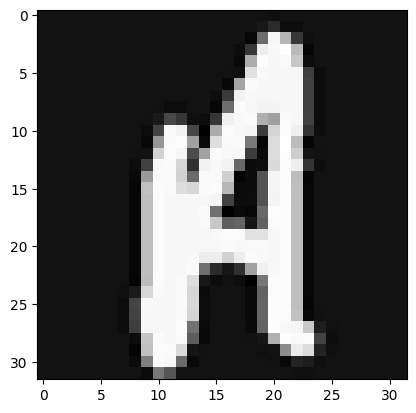

In [15]:
train_data = scipy.io.loadmat('/content/data/nist36_train.mat')
valid_data = scipy.io.loadmat('/content/data/nist36_valid.mat')
test_data = scipy.io.loadmat('/content/data/nist36_test.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']
test_x, test_y = test_data['test_data'], test_data['test_labels']

if True: # view the data
    for crop in train_x:
        plt.imshow(crop.reshape(32,32).T, cmap="Greys")
        plt.show()
        break

In [16]:
############################## Q 3.1 ##############################
def question_3_1(batch_size, lr):
    max_iters = 50
    # pick a batch size, learning rate
    np.random.seed(42)
    batch_size = batch_size
    learning_rate = lr
    hidden_size = 64
    ##########################
    ##### your code here #####
    ##########################


    batches = get_random_batches(train_x,train_y,batch_size)
    batch_num = len(batches)

    params = {}

    # initialize layers
    initialize_weights(train_x.shape[1], hidden_size, params, "layer1")
    initialize_weights(hidden_size, train_y.shape[1], params, "output")
    layer1_W_initial = np.copy(params["Wlayer1"]) # copy for Q3.3

    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []
    for itr in range(max_iters):
        # record training and validation loss and accuracy for plotting
        h1 = forward(train_x,params,'layer1',sigmoid)
        probs = forward(h1,params,'output',softmax)
        loss, acc = compute_loss_and_acc(train_y, probs)
        train_loss.append(loss/train_x.shape[0])
        train_acc.append(acc)

        h1 = forward(valid_x,params,'layer1',sigmoid)
        probs = forward(h1,params,'output',softmax)
        loss, acc = compute_loss_and_acc(valid_y, probs)
        valid_loss.append(loss/valid_x.shape[0])
        valid_acc.append(acc)

        total_loss = 0
        avg_acc = 0
        for xb,yb in batches:
            # training loop can be exactly the same as q2!
            ##########################
            ##### your code here #####
            # forward
            h1 = forward(xb,params,'layer1',sigmoid)
            probs = forward(h1,params,'output',softmax)

            # loss
            # be sure to add loss and accuracy to epoch totals
            loss, acc = compute_loss_and_acc(yb, probs)
            total_loss += loss
            avg_acc += acc

            # backward
            delta1 = probs - yb
            delta2 = backwards(delta1, params,'output',linear_deriv)
            backwards(delta2,params,'layer1',sigmoid_deriv)

            # apply gradient to update the parameters
            for k, v in params.items():
                if k.startswith('W') or k.startswith('b'):
                    params[k] -= learning_rate * params['grad_'+k]

        avg_acc = avg_acc / len(batches)
            ##########################


        if itr % 2 == 0:
            print("itr: {:02d}   loss: {:.2f}   acc: {:.2f}".format(itr,total_loss,avg_acc))

    # record final training and validation accuracy and loss
    h1 = forward(train_x,params,'layer1',sigmoid)
    probs = forward(h1,params,'output',softmax)
    loss, acc = compute_loss_and_acc(train_y, probs)
    train_loss.append(loss/train_x.shape[0])
    train_acc.append(acc)

    h1 = forward(valid_x,params,'layer1',sigmoid)
    probs = forward(h1,params,'output',softmax)
    loss, acc = compute_loss_and_acc(valid_y, probs)
    valid_loss.append(loss/valid_x.shape[0])
    valid_acc.append(acc)

    # report validation accuracy; aim for 75%
    print('Validation accuracy: ', valid_acc[-1])

    # compute and report test accuracy
    h1 = forward(test_x,params,'layer1',sigmoid)
    test_probs = forward(h1,params,'output',softmax)
    _, test_acc = compute_loss_and_acc(test_y, test_probs)
    print('Test accuracy: ', test_acc)

    return train_loss, train_acc, valid_loss, valid_acc, layer1_W_initial, params

# Tuned batch size and learning rate
train_loss, train_acc, valid_loss, valid_acc, layer1_W_initial, params = question_3_1(batch_size = 64, lr = 0.002)

itr: 00   loss: 37198.77   acc: 0.11
itr: 02   loss: 26110.05   acc: 0.47
itr: 04   loss: 19168.01   acc: 0.58
itr: 06   loss: 15897.03   acc: 0.63
itr: 08   loss: 14086.54   acc: 0.66
itr: 10   loss: 12907.76   acc: 0.68
itr: 12   loss: 12046.61   acc: 0.70
itr: 14   loss: 11368.62   acc: 0.72
itr: 16   loss: 10808.62   acc: 0.73
itr: 18   loss: 10331.04   acc: 0.74
itr: 20   loss: 9914.28   acc: 0.75
itr: 22   loss: 9544.11   acc: 0.76
itr: 24   loss: 9210.65   acc: 0.77
itr: 26   loss: 8906.74   acc: 0.78
itr: 28   loss: 8627.08   acc: 0.79
itr: 30   loss: 8367.66   acc: 0.79
itr: 32   loss: 8125.40   acc: 0.80
itr: 34   loss: 7897.87   acc: 0.80
itr: 36   loss: 7683.13   acc: 0.81
itr: 38   loss: 7479.60   acc: 0.81
itr: 40   loss: 7286.03   acc: 0.82
itr: 42   loss: 7101.36   acc: 0.82
itr: 44   loss: 6924.74   acc: 0.83
itr: 46   loss: 6755.45   acc: 0.83
itr: 48   loss: 6592.90   acc: 0.83
Validation accuracy:  0.7608333333333334
Test accuracy:  0.77


In [17]:
# save the final network
import pickle

saved_params = {k:v for k,v in params.items() if '_' not in k}
with open('/content/q3_weights.pickle', 'wb') as handle:
  pickle.dump(saved_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

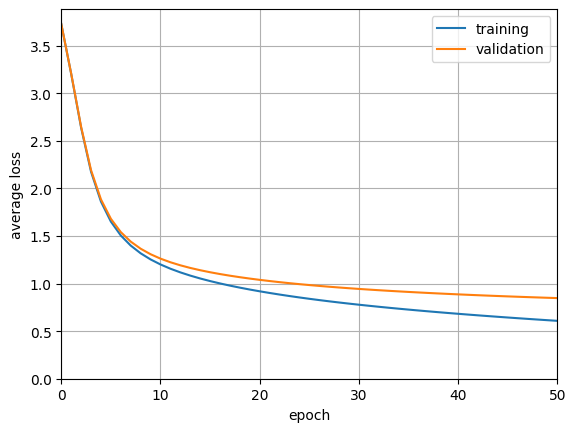

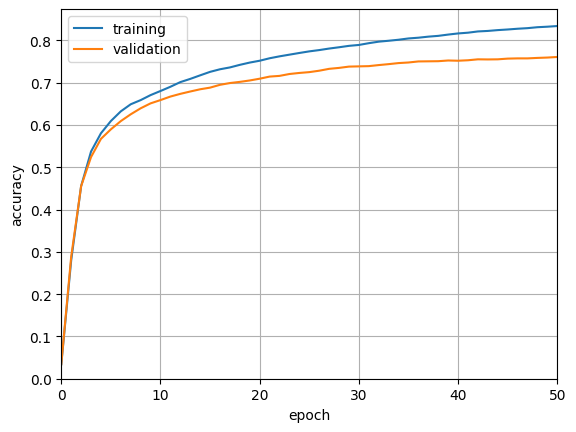

In [18]:
def plot_curves(train_loss, train_acc, valid_loss, valid_acc):
    # plot loss curves
    plt.plot(range(len(train_loss)), train_loss, label="training")
    plt.plot(range(len(valid_loss)), valid_loss, label="validation")
    plt.xlabel("epoch")
    plt.ylabel("average loss")
    plt.xlim(0, len(train_loss)-1)
    plt.ylim(0, None)
    plt.legend()
    plt.grid()
    plt.show()

    # plot accuracy curves
    plt.plot(range(len(train_acc)), train_acc, label="training")
    plt.plot(range(len(valid_acc)), valid_acc, label="validation")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.xlim(0, len(train_acc)-1)
    plt.ylim(0, None)
    plt.legend()
    plt.grid()
    plt.show()
plot_curves(train_loss, train_acc, valid_loss, valid_acc)

## Q3.2 (3 points)

The provided code will visualize the first layer weights as 64 32x32 images, both immediately after initialization and after full training. Generate both visualizations. Comment on the learned weights and compare them to the initialized weights. Do you notice any patterns?

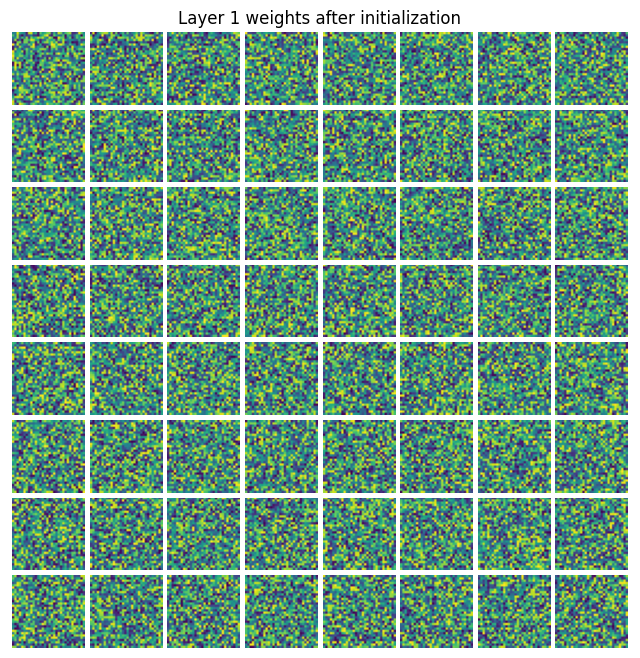

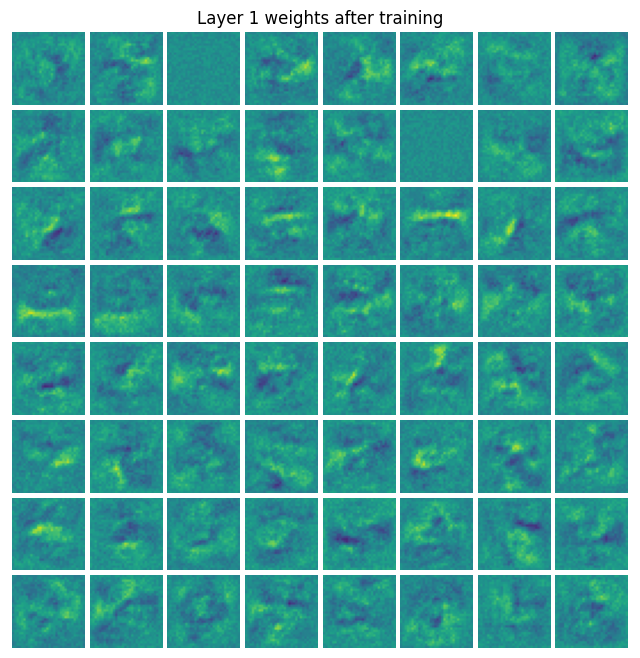

In [19]:
############################## Q 3.2 ##############################
# visualize weights
fig = plt.figure(figsize=(8,8))
plt.title("Layer 1 weights after initialization")
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(8, 8), axes_pad=0.05)
for i, ax in enumerate(grid):
    ax.imshow(layer1_W_initial[:,i].reshape((32, 32)).T)
    ax.set_axis_off()
plt.show()

v = np.max(np.abs(params['Wlayer1']))
fig = plt.figure(figsize=(8,8))
plt.title("Layer 1 weights after training")
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(8, 8), axes_pad=0.05)
for i, ax in enumerate(grid):
    ax.imshow(params['Wlayer1'][:,i].reshape((32, 32)).T, vmin=-v, vmax=v)
    ax.set_axis_off()
plt.show()

---

The initialized weights are pure noise with random pixel patterns and no spatial structure. After training, the weights show some structure. The weights become smooth, low-frequency patterns with oriented edges, blobs, and stroke-like shapes. This shows that the network has learned meaningful low-level features instead of random noise. These could be aggregated to get more meaningful shapes.

---

## Q3.3 (3 points)

Use the code in Q3.1 to train and generate accuracy and loss plots for each of these three networks:

(1) one with $10$ times your tuned learning rate,
    
(2) one with one-tenth your tuned learning rate, and

(3) one with your tuned learning rate.
    
Include total of six plots (two will be the same from Q3.1). Comment on how the learning rates affect the training, and report the final accuracy of the best network on the test set. Hint: Use fixed random seeds to improve reproducibility.

itr: 00   loss: 38534.46   acc: 0.04
itr: 02   loss: 32331.11   acc: 0.15
itr: 04   loss: 25785.30   acc: 0.31
itr: 06   loss: 22034.41   acc: 0.40
itr: 08   loss: 19652.63   acc: 0.47
itr: 10   loss: 17580.33   acc: 0.52
itr: 12   loss: 15909.92   acc: 0.57
itr: 14   loss: 15511.25   acc: 0.58
itr: 16   loss: 14055.63   acc: 0.62
itr: 18   loss: 13428.68   acc: 0.63
itr: 20   loss: 12758.62   acc: 0.65
itr: 22   loss: 12126.67   acc: 0.67
itr: 24   loss: 11677.59   acc: 0.68
itr: 26   loss: 11117.27   acc: 0.70
itr: 28   loss: 10743.99   acc: 0.70
itr: 30   loss: 10801.14   acc: 0.71
itr: 32   loss: 10889.18   acc: 0.70
itr: 34   loss: 10501.69   acc: 0.71
itr: 36   loss: 10081.94   acc: 0.72
itr: 38   loss: 9841.87   acc: 0.72
itr: 40   loss: 9689.96   acc: 0.73
itr: 42   loss: 9748.52   acc: 0.73
itr: 44   loss: 9493.52   acc: 0.74
itr: 46   loss: 9236.70   acc: 0.74
itr: 48   loss: 8845.46   acc: 0.75
Validation accuracy:  0.6233333333333333
Test accuracy:  0.6244444444444445


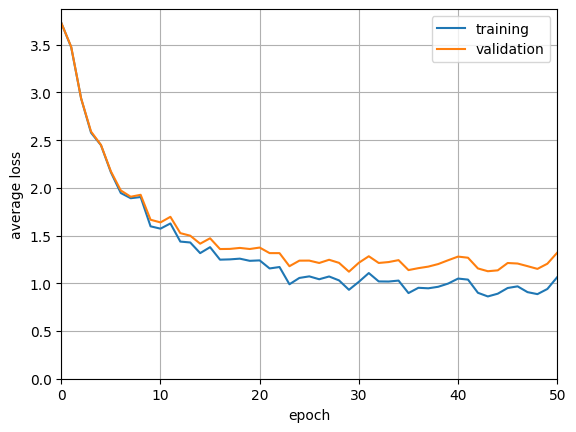

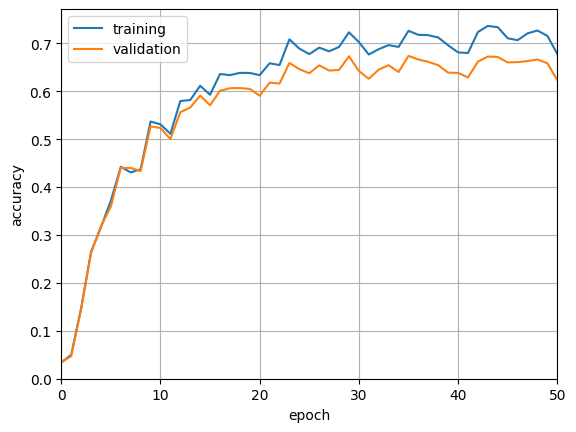

itr: 00   loss: 39009.96   acc: 0.04
itr: 02   loss: 37889.53   acc: 0.11
itr: 04   loss: 36947.57   acc: 0.20
itr: 06   loss: 35908.22   acc: 0.29
itr: 08   loss: 34757.27   acc: 0.35
itr: 10   loss: 33511.47   acc: 0.40
itr: 12   loss: 32214.60   acc: 0.43
itr: 14   loss: 30893.35   acc: 0.46
itr: 16   loss: 29591.75   acc: 0.48
itr: 18   loss: 28338.36   acc: 0.50
itr: 20   loss: 27149.04   acc: 0.51
itr: 22   loss: 26032.90   acc: 0.53
itr: 24   loss: 24993.75   acc: 0.54
itr: 26   loss: 24031.54   acc: 0.55
itr: 28   loss: 23143.74   acc: 0.56
itr: 30   loss: 22326.31   acc: 0.57
itr: 32   loss: 21574.48   acc: 0.58
itr: 34   loss: 20883.20   acc: 0.58
itr: 36   loss: 20247.42   acc: 0.59
itr: 38   loss: 19662.24   acc: 0.60
itr: 40   loss: 19123.05   acc: 0.60
itr: 42   loss: 18625.54   acc: 0.61
itr: 44   loss: 18165.78   acc: 0.62
itr: 46   loss: 17740.14   acc: 0.62
itr: 48   loss: 17345.35   acc: 0.63
Validation accuracy:  0.6036111111111111
Test accuracy:  0.6177777777777778

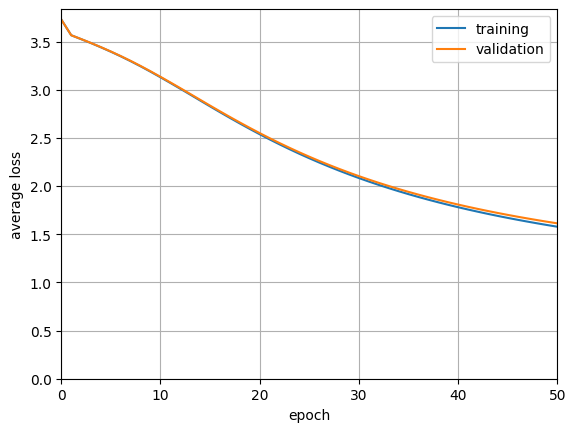

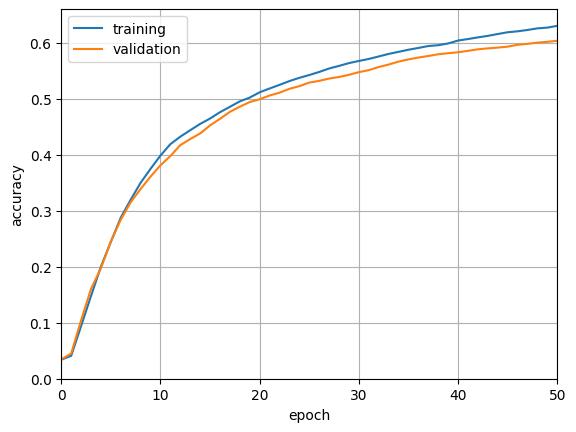

itr: 00   loss: 37198.77   acc: 0.11
itr: 02   loss: 26110.05   acc: 0.47
itr: 04   loss: 19168.01   acc: 0.58
itr: 06   loss: 15897.03   acc: 0.63
itr: 08   loss: 14086.54   acc: 0.66
itr: 10   loss: 12907.76   acc: 0.68
itr: 12   loss: 12046.61   acc: 0.70
itr: 14   loss: 11368.62   acc: 0.72
itr: 16   loss: 10808.62   acc: 0.73
itr: 18   loss: 10331.04   acc: 0.74
itr: 20   loss: 9914.28   acc: 0.75
itr: 22   loss: 9544.11   acc: 0.76
itr: 24   loss: 9210.65   acc: 0.77
itr: 26   loss: 8906.74   acc: 0.78
itr: 28   loss: 8627.08   acc: 0.79
itr: 30   loss: 8367.66   acc: 0.79
itr: 32   loss: 8125.40   acc: 0.80
itr: 34   loss: 7897.87   acc: 0.80
itr: 36   loss: 7683.13   acc: 0.81
itr: 38   loss: 7479.60   acc: 0.81
itr: 40   loss: 7286.03   acc: 0.82
itr: 42   loss: 7101.36   acc: 0.82
itr: 44   loss: 6924.74   acc: 0.83
itr: 46   loss: 6755.45   acc: 0.83
itr: 48   loss: 6592.90   acc: 0.83
Validation accuracy:  0.7608333333333334
Test accuracy:  0.77


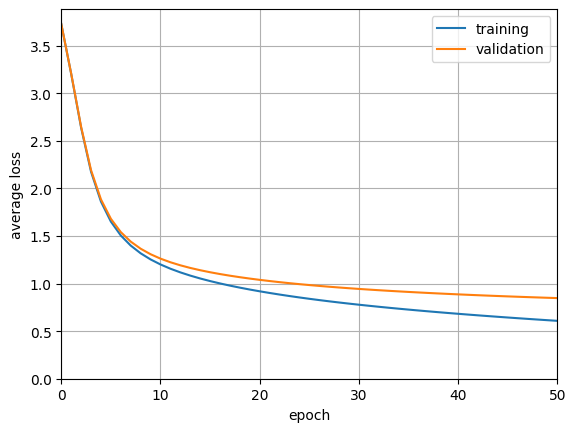

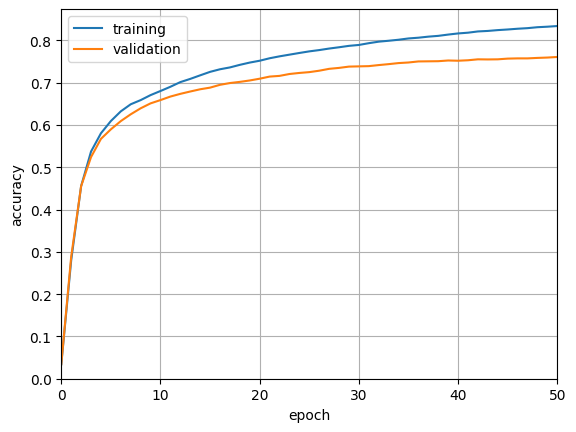

In [20]:
############################## Q 3.3 ##############################
##########################
##### your code here #####
tuned_batch_size = 64
tuned_lr = 0.002
train_loss, train_acc, valid_loss, valid_acc, layer1_W_initial, params = question_3_1(tuned_batch_size, tuned_lr * 10)
plot_curves(train_loss, train_acc, valid_loss, valid_acc)

train_loss, train_acc, valid_loss, valid_acc, layer1_W_initial, params = question_3_1(tuned_batch_size, tuned_lr / 10)
plot_curves(train_loss, train_acc, valid_loss, valid_acc)

train_loss, train_acc, valid_loss, valid_acc, layer1_W_initial, params = question_3_1(tuned_batch_size, tuned_lr)
plot_curves(train_loss, train_acc, valid_loss, valid_acc)
##########################


---

We see that for very high learning rates the learning happens very fast initially and then becomes stagnant with high oscillations in accuracy as well. This is because the lr is too large to reach the minima.
Whereas when the lr is too low the learning happens slower as the network is taking very small steps in the direction of the minima this would lead to a larger convergence time. We see that the sweet spot is neither too large nor too small lr.  
The final accuracy of the best network i.e network with tuned_batch_size = 64
tuned_lr = 0.002 on the test set is 0.77.

---

## Q3.4 (3 points)

Compute and visualize the confusion matrix of the test data for your best model. Comment on the top few pairs of classes that are most commonly confused.

itr: 00   loss: 37198.77   acc: 0.11
itr: 02   loss: 26110.05   acc: 0.47
itr: 04   loss: 19168.01   acc: 0.58
itr: 06   loss: 15897.03   acc: 0.63
itr: 08   loss: 14086.54   acc: 0.66
itr: 10   loss: 12907.76   acc: 0.68
itr: 12   loss: 12046.61   acc: 0.70
itr: 14   loss: 11368.62   acc: 0.72
itr: 16   loss: 10808.62   acc: 0.73
itr: 18   loss: 10331.04   acc: 0.74
itr: 20   loss: 9914.28   acc: 0.75
itr: 22   loss: 9544.11   acc: 0.76
itr: 24   loss: 9210.65   acc: 0.77
itr: 26   loss: 8906.74   acc: 0.78
itr: 28   loss: 8627.08   acc: 0.79
itr: 30   loss: 8367.66   acc: 0.79
itr: 32   loss: 8125.40   acc: 0.80
itr: 34   loss: 7897.87   acc: 0.80
itr: 36   loss: 7683.13   acc: 0.81
itr: 38   loss: 7479.60   acc: 0.81
itr: 40   loss: 7286.03   acc: 0.82
itr: 42   loss: 7101.36   acc: 0.82
itr: 44   loss: 6924.74   acc: 0.83
itr: 46   loss: 6755.45   acc: 0.83
itr: 48   loss: 6592.90   acc: 0.83
Validation accuracy:  0.7608333333333334
Test accuracy:  0.77


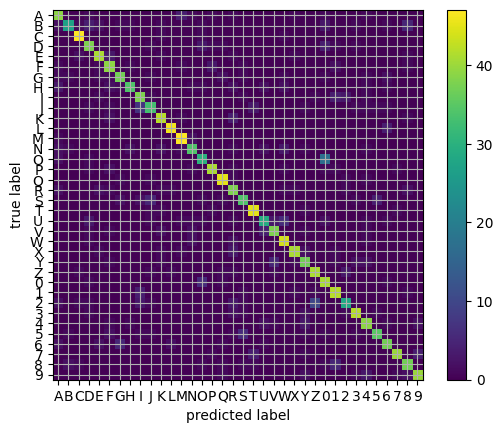

In [21]:
############################## Q 3.4 ##############################
confusion_matrix = np.zeros((train_y.shape[1],train_y.shape[1]))

# compute confusion matrix
##########################
##### your code here #####
train_loss, train_acc, valid_loss, valid_acc, layer1_W_initial, params = question_3_1(tuned_batch_size, tuned_lr)
test_x, test_y = test_data['test_data'], test_data['test_labels']

h1 = forward(test_x,params,'layer1',sigmoid)
test_probs = forward(h1,params,'output',softmax)
_, test_acc = compute_loss_and_acc(test_y, test_probs)

# print(test_y.shape)
# print(test_probs.shape)

y_true = np.argmax(test_y, axis=1)
y_pred = np.argmax(test_probs, axis=1)
# print(y_true.shape)

for true_values, predicted_values in zip(y_true, y_pred):
    confusion_matrix[true_values, predicted_values] += 1

##########################



# visualize confusion matrix
import string
plt.imshow(confusion_matrix,interpolation='nearest')
plt.grid()
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
plt.show()

In [22]:
classes = list(string.ascii_uppercase) + [str(i) for i in range(10)]

cm = confusion_matrix.copy()
np.fill_diagonal(cm, 0)

k = 6
pairs = []
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] > 0:
            pairs.append((i, j, cm[i, j]))

pairs = sorted(pairs, key=lambda x: x[2], reverse=True)

print("Top confused class pairs:")
for i, j, count in pairs[:k]:
    print(f"True: {classes[i]}, Predicted: {classes[j]}, Count: {int(count)}")


Top confused class pairs:
True: O, Predicted: 0, Count: 17
True: 2, Predicted: Z, Count: 10
True: J, Predicted: I, Count: 7
True: U, Predicted: W, Count: 6
True: 0, Predicted: O, Count: 6
True: 5, Predicted: S, Count: 6


---

Top confused class pairs:
True: O, Predicted: 0, Count: 17
True: 2, Predicted: Z, Count: 10
True: J, Predicted: I, Count: 7
True: U, Predicted: W, Count: 6
True: 0, Predicted: O, Count: 6
True: 5, Predicted: S, Count: 6

The most confused pairs are visually similar characters, such as O vs 0, 5 vs S, J vs I, and U vs W, which share  identical structures. the model struggles  with characters that are naturally ambiguous in handwritten form also.

---

# Q4 Image Compression with Autoencoders

An autoencoder is a neural network that is trained to attempt to copy its input to its output, but it usually allows copying only approximately. This is typically achieved by restricting the number of hidden nodes inside the autoencoder; in other words, the autoencoder would be forced to learn to represent data with this limited number of hidden nodes. This is a useful way of learning compressed representations.

In this section, we will continue using the NIST36 dataset you have from the previous questions.

## Q4.1 Building the Autoencoder

### Q4.1 (4 points)

Due to the difficulty in training auto-encoders, we have to move to the $relu(x) = max(x,0)$ activation function. It is provided for you. We will build an autoencoder with the layers listed below. Initialize the layers with the initialize_weights() function you wrote in Q2.1.2.

- 1024 to 32 dimensions, followed by a ReLU
- 32 to 32 dimensions, followed by a ReLU
- 32 to 32 dimensions, followed by a ReLU
- 32 to 1024 dimensions, followed by a sigmoid (this normalizes the image output for us)

In [23]:
# here we provide the relu activation and its derivative for you
from collections import Counter

def relu(x):
    return np.maximum(x,0)

def relu_deriv(x):
    return (x > 0).astype(float)

############################## Q 4.1 ##############################
params = Counter()

# initialize layers here
##########################
##### your code here #####
initialize_weights(1024,32,params,'layer1')
initialize_weights(32,32,params,'layer2')
initialize_weights(32,32,params,'layer3')
initialize_weights(32,1024,params,'output')
##########################



## Q4.2 Training the Autoencoder

### Q4.2.1 (5 points)

To help even more with convergence speed, we will implement momentum. Now, instead of updating $W = W - \alpha \frac{\partial J}{\partial W}$, we will use the update rules $M_W = 0.9 M_W - \alpha \frac{\partial J}{\partial W}$ and $W = W + M_W$. To implement momentum, populate the parameters dictionary with zero-initialized momentum accumulators M, one for each parameter. Then simply perform both update equations for every batch.

### Q4.2.2 (6 points)

Using the provided default settings, train the network for 100 epochs. The loss function that you will use is the total squared error for the output image compared to the input image (they should be the same!). Plot the training loss curve. What do you observe?

itr: 00 	 loss: 874277.00
itr: 02 	 loss: 591034.87
itr: 04 	 loss: 516233.87
itr: 06 	 loss: 471237.31
itr: 08 	 loss: 453115.86
itr: 10 	 loss: 428544.86
itr: 12 	 loss: 421179.06
itr: 14 	 loss: 397293.63
itr: 16 	 loss: 389595.32
itr: 18 	 loss: 386887.91
itr: 20 	 loss: 382540.68
itr: 22 	 loss: 379322.62
itr: 24 	 loss: 372070.66
itr: 26 	 loss: 364884.92
itr: 28 	 loss: 361356.27
itr: 30 	 loss: 359146.22
itr: 32 	 loss: 357278.62
itr: 34 	 loss: 355626.53
itr: 36 	 loss: 354086.56
itr: 38 	 loss: 353510.77
itr: 40 	 loss: 351702.64
itr: 42 	 loss: 349281.15
itr: 44 	 loss: 347790.42
itr: 46 	 loss: 346616.68
itr: 48 	 loss: 345414.74
itr: 50 	 loss: 344422.15
itr: 52 	 loss: 343734.92
itr: 54 	 loss: 343225.60
itr: 56 	 loss: 342588.35
itr: 58 	 loss: 342340.80
itr: 60 	 loss: 341473.69
itr: 62 	 loss: 339925.80
itr: 64 	 loss: 339194.40
itr: 66 	 loss: 338788.22
itr: 68 	 loss: 338314.46
itr: 70 	 loss: 337629.24
itr: 72 	 loss: 337488.33
itr: 74 	 loss: 336944.07
itr: 76 	 lo

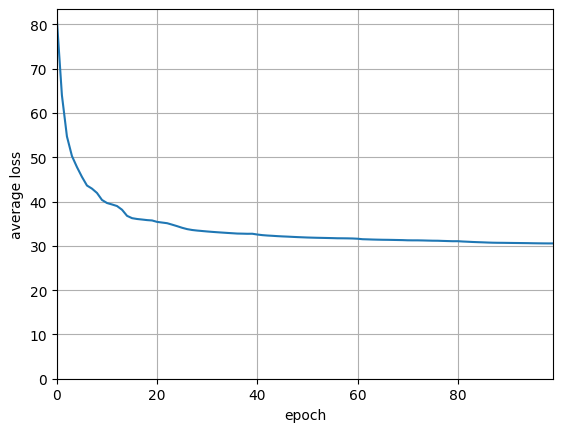

In [24]:
########################### Q 4.2.1 & Q 4.2.2 ########################
# the NIST36 dataset
train_data = scipy.io.loadmat('/content/data/nist36_train.mat')
valid_data = scipy.io.loadmat('/content/data/nist36_valid.mat')

# we don't need labels now!
train_x = train_data['train_data']
valid_x = valid_data['valid_data']

max_iters = 100
# pick a batch size, learning rate
batch_size = 36
learning_rate =  3e-5
hidden_size = 32
lr_rate = 20
batches = get_random_batches(train_x,np.ones((train_x.shape[0],1)),batch_size)
batch_num = len(batches)

# should look like your previous training loops
losses = []
for itr in range(max_iters):
    total_loss = 0
    for xb,_ in batches:
        # training loop can be exactly the same as q2!
        # your loss is now the total squared error, i.e. the sum of (x-y)^2
        # delta is the d/dx of (x-y)^2
        # to implement momentum
        #   just use 'M_'+name variables as momentum accumulators to keep a saved value over steps
        #   params is a Counter(), which returns a 0 if an element is missing
        #   so you should be able to write your loop without any special conditions

        ##########################
        ##### your code here #####
        h1 = forward(xb,params,'layer1',relu)
        h2 = forward(h1,params,'layer2',relu)
        h3 = forward(h2,params,'layer3',relu)
        probs = forward(h3,params,'output',sigmoid)

        # loss
        # be sure to add loss and accuracy to epoch totals
        loss = np.sum((probs - xb) ** 2)
        total_loss += loss

        # backward
        delta1 = 2 * (probs - xb)
        delta2 = backwards(delta1, params,'output',sigmoid_deriv)
        delta3 = backwards(delta2, params,'layer3',relu_deriv)
        delta4 = backwards(delta3, params,'layer2',relu_deriv)
        backwards(delta4, params,'layer1',relu_deriv)

        # apply gradient to update the parameters
        for k in list(params.keys()):
            if k.startswith('W') or k.startswith('b'):
                grad = params['grad_'+k]
                params['M_'+k] = 0.9 * params['M_'+k] - learning_rate * grad
                params[k] += params['M_'+k]

        ##########################


    losses.append(total_loss/train_x.shape[0])
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f}".format(itr,total_loss))
    if itr % lr_rate == lr_rate-1:
        learning_rate *= 0.9

# plot loss curve
plt.plot(range(len(losses)), losses)
plt.xlabel("epoch")
plt.ylabel("average loss")
plt.xlim(0, len(losses)-1)
plt.ylim(0, None)
plt.grid()
plt.show()

---

We see that the network learns as the loss is decreasing iinitially and gradually flattens and the network has reached its capacity to learn. This might be because of the small size of the network and small layer sizes.
---

## Q4.3 Evaluating the Autoencoder

### Q4.3.1 (5 points)

Now let's evaluate how well the autoencoder has been trained. Select 5 classes from the total 36 classes in the validation set and for each selected class show 2 validation images and their reconstruction. What differences do you observe in the reconstructed validation images compared to the original ones?

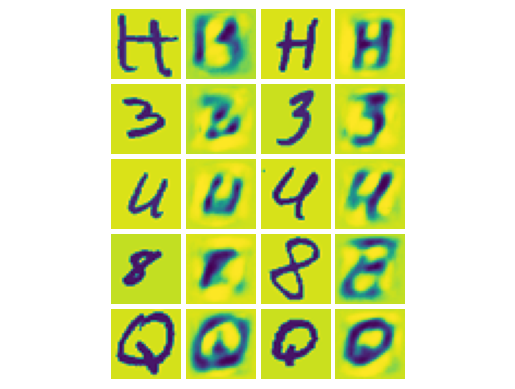

In [25]:
############################## Q 4.3.1 ##############################
# choose 5 classes (change if you want)
visualize_labels = ["H", "3", "U", "8", "Q"]

# get 2 validation images from each label to visualize
visualize_x = np.zeros((2*len(visualize_labels), valid_x.shape[1]))
for i, label in enumerate(visualize_labels):
    idx = 26+int(label) if label.isnumeric() else string.ascii_lowercase.index(label.lower())
    choices = np.random.choice(np.arange(100*idx, 100*(idx+1)), 2, replace=False)
    visualize_x[2*i:2*i+2] = valid_x[choices]

# run visualize_x through your network
# using the forward() function you wrote in Q2.2.1
reconstructed_x = visualize_x
# TODO: name the output reconstructed_x
##########################
##### your code here #####
h1 = forward(visualize_x,params,'layer1',relu)
h2 = forward(h1,params,'layer2',relu)
h3 = forward(h2,params,'layer3',relu)
reconstructed_x = forward(h3,params,'output',sigmoid)
##########################


# visualize
fig = plt.figure()
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(len(visualize_labels), 4), axes_pad=0.05)
for i, ax in enumerate(grid):
    if i % 2 == 0:
        ax.imshow(visualize_x[i//2].reshape((32, 32)).T)
    else:
        ax.imshow(reconstructed_x[i//2].reshape((32, 32)).T)
    ax.set_axis_off()
plt.show()

---

We see that the output images can make some sense of the number and can reconstruct blurry images of the numbers. The reconstruction is not as good as the original images because of the small size of the network and small layer dimensionality.
The reconstruction may also not be good since we are using simple MSE as the loss function.

---

### Q4.3.2 (5 points)

Let’s evaluate the reconstruction quality using Peak Signal-to-noise Ratio (PSNR). PSNR is defined as

$$\text{PSNR} = 20 \times \log_{10}(\text{MAX}_I) - 10\times \log_{10}(\text{MSE})$$

where $\text{MAX}_I$ is the maximum possible pixel value of the image, and $\text{MSE}$ (mean squared error) is computed across all pixels. Said another way, maximum refers to the brightest overall sum (maximum positive value of the sum). You may use skimage.metrics.peak_signal_noise_ratio for convenience. Report the average PSNR you get from the autoencoder across all images in the validation set (it should be around 15).

In [26]:
############################## Q 4.3.2 ##############################
from skimage.metrics import peak_signal_noise_ratio
# evaluate PSNR
##########################
##### your code here #####
h1 = forward(valid_x,params,'layer1',relu)
h2 = forward(h1,params,'layer2',relu)
h3 = forward(h2,params,'layer3',relu)
reconstructed = forward(h3,params,'output',sigmoid)

psnr_vals = []

for i in range(valid_x.shape[0]):
    psnr_vals.append(peak_signal_noise_ratio(valid_x[i].reshape(32, 32), reconstructed[i].reshape(32, 32), data_range=1.0))

print("Average PSNR:", np.mean(psnr_vals))

##########################



Average PSNR: 15.553807947516956


---

Average PSNR: 15.553807947516956
An average PSNR of 15.55 means that the autoencoder's reconstruction are visibly similar but not very sharp. Which we also see in the images above.

---

# Q5 (Extra Credit) Extract Text from Images

Run below code to download and put the unzipped data in '/content/images' folder. We have provided you with 01_list.jpg, 02_letters.jpg, 03_haiku.jpg and 04_deep.jpg to test your implementation on.

In [27]:
if not os.path.exists('/content/images'):
  os.mkdir('/content/images')
  !wget http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip -O /content/images/images.zip
  !unzip "/content/images/images.zip" -d "/content/images"
  os.system("rm /content/images/images.zip")

--2025-11-25 23:01:27--  http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3248168 (3.1M) [application/zip]
Saving to: ‘/content/images/images.zip’

/content/images/ima 100%[===================>]   3.10M  14.4MB/s    in 0.2s    

2025-11-25 23:01:27 (14.4 MB/s) - ‘/content/images/images.zip’ saved [3248168/3248168]

Archive:  /content/images/images.zip
mapname:  conversion of  failed
  inflating: /content/images/03_haiku.jpg  
  inflating: /content/images/01_list.jpg  
  inflating: /content/images/02_letters.jpg  
  inflating: /content/images/04_deep.jpg  


In [28]:
ls /content/images

01_list.jpg*  02_letters.jpg*  03_haiku.jpg*  04_deep.jpg*


## Q5.1 (Extra Credit) (4 points)

The method outlined above is pretty simplistic, and while it works for the given text samples, it makes several assumptions. What are two big assumptions that the sample method makes?

---

The two assumptions that sample method takes is:  
1. Characters are separated and are not overlapping. The method assumes each letter can be isolated with simple thresholding and morphology. Overlapping, touching, cursive, or noisy text would break this assumption.

2. The text is aligned and arranged in clean horizontal lines. It assumes that lines of text are horizontal, evenly spaced, and that left-to-right ordering matches bounding-box sorting. Any rotation, slant, curved baseline, or irregular spacing would cause incorrect grouping.

---


## Q5.2 (Extra Credit) (10 points)

Implement the findLetters() function to find letters in the image. Given an RGB image, this function should return bounding boxes for all of the located handwritten characters in the image, as well as a binary black-and-white version of the image im. Each row of the matrix should contain [y1,x1,y2,x2], the positions of the top-left and bottom-right corners of the box. The black-and-white image should be between 0.0 to 1.0, with the characters in white and the background in black (consistent with the images in nist36). Hint: Since we read text left to right, top to bottom, we can use this to cluster the coordinates.

In [29]:
############################## Q 5.2 ##############################
def findLetters(image):
    """
    takes a color image
    returns a list of bounding boxes and black_and_white image
    """
    bboxes = []
    bw = None
    # insert processing in here
    # one idea estimate noise -> denoise -> greyscale -> threshold -> morphology -> label -> skip small boxes
    # this can be 10 to 15 lines of code using skimage functions

    ##########################
    ##### your code here #####
    gray = skimage.color.rgb2gray(image)

    denoised = skimage.restoration.denoise_bilateral(gray, sigma_color=0.05, sigma_spatial=3)

    thresh = skimage.filters.threshold_otsu(denoised)
    bw = denoised < thresh
    bw = bw.astype(float)

    bw = skimage.morphology.opening(bw, skimage.morphology.square(2))
    bw = skimage.morphology.dilation(bw, skimage.morphology.square(5))
    bw = skimage.morphology.closing(bw, skimage.morphology.square(3))

    bw_clean = skimage.morphology.remove_small_objects(bw.astype(bool), min_size=50)

    labeled = skimage.measure.label(bw_clean)

    bboxes = []
    for region in skimage.measure.regionprops(labeled):
        y1, x1, y2, x2 = region.bbox
        h = y2 - y1
        w = x2 - x1

        # skip extremely small blobs
        if h < 10 or w < 10:
            continue

        bboxes.append([y1, x1, y2, x2])

    ##########################


    return bboxes, bw

## Q5.3 (Extra Credit) (3 points)

Using the provided code below, visualize all of the located boxes on top of the binary image to show the accuracy of your findLetters() function. Include all the provided sample images with the boxes.


01_list.jpg


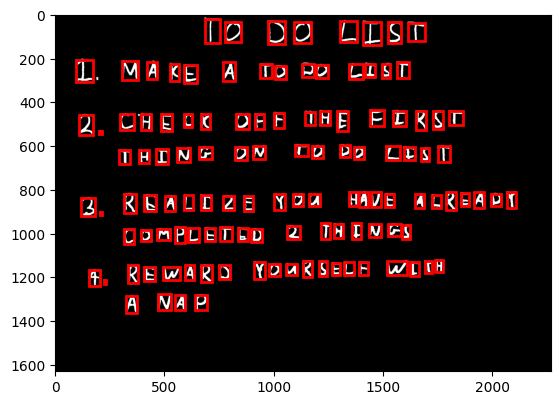


02_letters.jpg


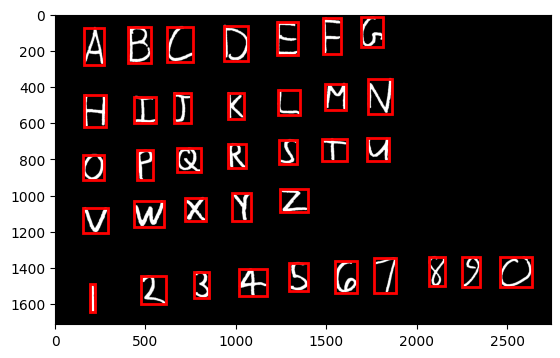


03_haiku.jpg


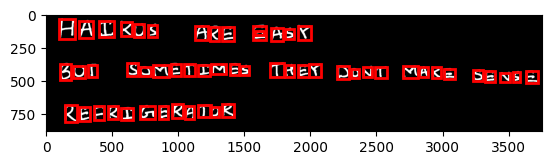


04_deep.jpg


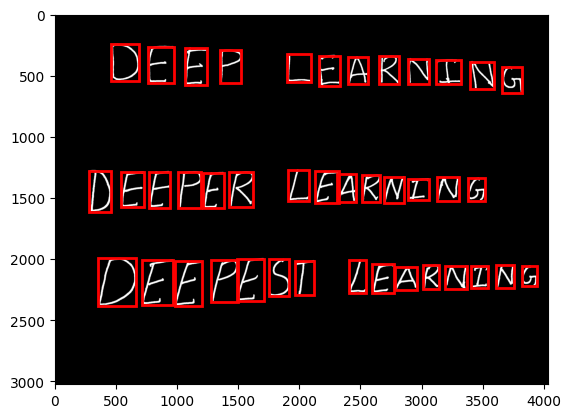

In [30]:
############################## Q 5.3 ##############################
# do not include any more libraries here!
# no opencv, no sklearn, etc!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

for imgno, img in enumerate(sorted(os.listdir('/content/images'))):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('/content/images',img)))
    bboxes, bw = findLetters(im1)

    print('\n' + img)
    plt.imshow(1-bw, cmap="Greys") # reverse the colors of the characters and the background for better visualization
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()

## Q5.4 (Extra Credit) (8 points)

You will now load the image, find the character locations, classify each one with the network you trained in Q3.1, and return the text contained in the image. Be sure you try to make your detected images look like the images from the training set. Visualize them and act accordingly. If you find that your classifier performs poorly, consider dilation under skimage morphology to make the letters thicker.

Your solution is correct if you can correctly detect most of the letters and classify approximately 70\% of the letters in each of the sample images.

Run your code on all the provided sample images in '/content/images'. Show the extracted text. It is fine if your code ignores spaces, but if so, please provide a written answer with manually added spaces.

In [39]:
############################## Q 5.4 ##############################
for imgno, img in enumerate(sorted(os.listdir('/content/images'))):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('/content/images',img)))
    bboxes, bw = findLetters(im1)
    print('\n' + img)

    # find the rows using..RANSAC, counting, clustering, etc.
    ##########################
    ##### your code here #####
    b = np.array(bboxes)
    ys = (b[:, 0] + b[:, 2]) / 2.0
    order = np.argsort(ys)
    b = b[order]

    lines = []
    current_line = [b[0]]

    for i in range(1, len(b)):
        bbox = b[i]
        center_row = (bbox[0] + bbox[2]) / 2.0
        cur_row_center = (current_line[0][0] + current_line[0][2]) / 2.0
        if abs(center_row - cur_row_center) < 100:
            current_line.append(bbox)
        else:
            lines.append(current_line)
            current_line = [bbox]
    lines.append(current_line)

    for i in range(len(lines)):
        lines[i] = sorted(lines[i], key=lambda x: x[1])
    ##########################



    # crop the bounding boxes
    # note.. before you flatten, transpose the image (that's how the dataset is!)
    # consider doing a square crop, and even using np.pad() to get your images looking more like the dataset
    ##########################
    ##### your code here #####
    line_crops = []
    for line in lines:
        current_line_crops = []
        for y1, x1, y2, x2 in line:
            crop = bw[y1:y2, x1:x2]

            h, w = crop.shape
            size = max(h, w)
            pad_y = (size - h) // 2
            pad_x = (size - w) // 2
            crop_sq = np.pad(
                crop,
                ((pad_y, size - h - pad_y), (pad_x, size - w - pad_x)),
                mode='constant',
                constant_values=0
            )

            crop_resized = skimage.transform.resize(crop_sq, (24, 24))
            crop = np.pad(crop_resized, ((4, 4), (4, 4)), mode='constant', constant_values=0)

            current_line_crops.append(crop)
        line_crops.append(np.array(current_line_crops))
    ##########################



    # load the weights
    # run the crops through your neural network and print them out
    import pickle
    import string
    letters = np.array([_ for _ in string.ascii_uppercase[:26]] + [str(_) for _ in range(10)])
    params = pickle.load(open('/content/q3_weights.pickle','rb'))
    ##########################
    ##### your code here #####
    for cropped_row in line_crops:
        pred = ""
        for cropped in cropped_row:
            cropped = 1.0 - cropped
            x = cropped.T.reshape(1, -1)
            h1 = forward(x, params, "layer1")
            probs = forward(h1, params, "output", softmax)
            predicted_label = letters[np.argmax(probs)]
            pred += predicted_label

        print(pred)
    ##########################




01_list.jpg
T0D0LIST
IMA8EAT0DOLIST
2QCH2CKDFETHEFIRST
THINGQNTQD0LIST
3BRIALIZEY0UHAVERLREADT
C0MPLETED2THINGS
F8REWARDY0URSELFWITR
ANAP

02_letters.jpg
1ECDEFG
HIIKLMN
0PQRSTV
WXYZ
V
3FS67170
1Z

03_haiku.jpg
HAIKUSAREEMASX
EUTSQMETIMESTREXDDNTMAKGSEMGE
REFRIGERAT0R

04_deep.jpg
DFEPLEARYI
NG
CEEP1RLCARXING
D11C1ST1EARQING


---

YOUR ANSWER HERE... (if your code ignores spaces)

---